In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Algorithms
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import pickle


In [23]:

# Load dataset
df = pd.read_csv("Dataset\\data.csv")
df = df.drop(columns=['car_links'])
# Label encoding for categorical variables
le = LabelEncoder()
data = pd.DataFrame()
data['fuel'] = le.fit_transform(df['ft'])
data['oem'] = le.fit_transform(df['oem'])
data['city'] = le.fit_transform(df['city'])
data['transmission'] = le.fit_transform(df['transmission'])
data['Gear Box'] = le.fit_transform(df['Gear Box'])

# Assign numerical columns directly
data['km'] = df['km']
data['ownerNo'] = df['ownerNo']
data['modelYear'] = df['modelYear']
data['Engine'] = df['Engine']
data['price'] = df['price']
data['Mileage'] = df['Mileage']
data['Max Power'] = df['Max Power']
data['Torque'] = df['Torque']
data['Length'] = df['Length']
data['Width'] = df['Width']
data['Height'] = df['Height']


In [24]:

# Define features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

# Handle missing values in target column
y = np.nan_to_num(y, nan=np.nanmean(y))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


XGBRegressor:
MSE: 77099583893.37822
RMSE: 277668.11825158866
R2: 0.9360246658325195


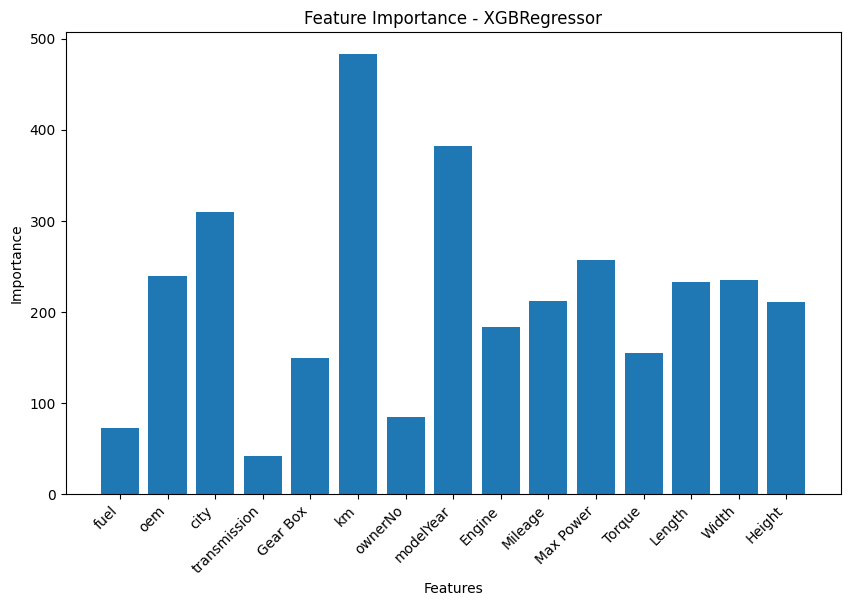

In [25]:

# Model 1: XGBRegressor
model_xgb = XGBRegressor(n_estimators=80)
model_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = model_xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBRegressor:")
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)

# Feature importance for XGBRegressor
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')
sorted_idx = np.argsort(list(feature_importance.values()))[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, list(feature_importance.values()))
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - XGBRegressor")
plt.show()


In [26]:

# Model 2: HistGradientBoostingRegressor
hgb_model = HistGradientBoostingRegressor()
hgb_model.fit(X_train_scaled, y_train)

y_pred_hgb = hgb_model.predict(X_test_scaled)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mse_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print("HistGradientBoostingRegressor:")
print("MSE:", mse_hgb)
print("RMSE:", rmse_hgb)
print("R2:", r2_hgb)


HistGradientBoostingRegressor:
MSE: 106730903690.92598
RMSE: 326696.9600270654
R2: 0.9114373517168374


In [10]:

# Model 3: DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_scaled, y_train)

y_pred_tree = decision_tree.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("DecisionTreeRegressor:")
print("MSE:", mse_tree)
print("MAE:", mae_tree)
print("R2:", r2_tree)


DecisionTreeRegressor:
MSE: 341413268752.1866
MAE: 162213.47935368042
R2: 0.7167037643823921


In [12]:

# Model 4: RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForestRegressor:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


RandomForestRegressor:
MSE: 79360899041.26622
RMSE: 281710.6654730456
R2: 0.9341483005748711


In [13]:

# Model 5: LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred_lr = linear_regression.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("LinearRegression:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R2:", r2_lr)


LinearRegression:
MSE: 421863472249.19086
MAE: 418593.50362699333
R2: 0.6499481872231614


In [14]:

# Model 6: Support Vector Regressor with missing value imputation
svm_model = SVR(kernel='rbf')
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

svm_model.fit(X_train_imputed, y_train)
y_pred_svm = svm_model.predict(X_test_imputed)

mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Support Vector Regressor:")
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("R2:", r2_svm)


Support Vector Regressor:
MSE: 1298451513007.4048
RMSE: 1139496.1662978095
R2: -0.07742275838138246


In [20]:

# Save models and pre-processing objects
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
with open('hgb_model.pkl', 'wb') as f:
    pickle.dump(hgb_model, f)
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(linear_regression, f)

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)